## Importing the libraries

In [ ]:
# Dataframe
import pandas as pd

# Sentiment Analysis
!pip install -q transformers
!pip install emoji
from transformers import pipeline

# WordCloud
import wordcloud
from wordcloud import WordCloud

import numpy as np
from pprint import pprint

# Regex
import re

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Topic Modeling
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# from gensim.models import TfidfModel
from gensim.models.wrappers import LdaMallet

#vis
# !conda install --yes --prefix {sys.prefix} -c conda-forge pyldavis 
# !pip install pyLDAvis
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis

     |████████████████████████████████| 4.0 MB 3.9 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 58.3 MB/s 
     |████████████████████████████████| 6.6 MB 26.4 MB/s 
     |████████████████████████████████| 895 kB 54.5 MB/s 
     |████████████████████████████████| 175 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=cbc204099e21eb2cdbe9411d5f186605d347994729c3a0c6eb2eeafc0e7619e0
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.z

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


## Read in the data from the dataset

In [ ]:
header_list = ["Tweet Id", "Text", "Date", "Location"]
df = pd.read_excel('Twitter_Dataset2.xlsx', na_values=['NA'], index_col=False, header=None, names=header_list)
df.head(10)

Tweet Id                                               Text       Date  \
0  1.489751e+18  Cutting-edge gallium nitride tech could help #... 2022-02-04   
1  1.489751e+18  Rattanindia Ent @ 57.00 /-\n\n #revolt #sustai... 2022-02-04   
2  1.489750e+18  Utilities’ Carbon-Reduction Goals Will Have Li... 2022-02-04   
3  1.489750e+18  Big Thanks to @CreativeMurdock! \n\nGreat art ... 2022-02-04   
4  1.489750e+18  Hurts me to post this (sorry fellow Tesla driv... 2022-02-04   
5  1.489750e+18  There are dozens of electric vehicles on the m... 2022-02-04   
6  1.489749e+18  “New analysis from Atlas Public Policy finds e... 2022-02-04   
7  1.489749e+18  It’s tax season! Did you know that there are a... 2022-02-04   
8  1.489749e+18  From bills aimed at promoting electric vehicle... 2022-02-04   
9  1.489748e+18  Inergency\nThe ambition loop in motion for ele... 2022-02-04   

                 Location  
0                     NaN  
1  Bengaluru South, India  
2                     NaN  
3                     NaN  
4                     NaN  
5                     NaN  
6                     NaN  
7                     NaN  
8                     NaN  
9                     NaN

# Explore the dataset

In [ ]:
#What is the shape of the dataset
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 18467 rows and 4 columns


## Data collection daily bar plot

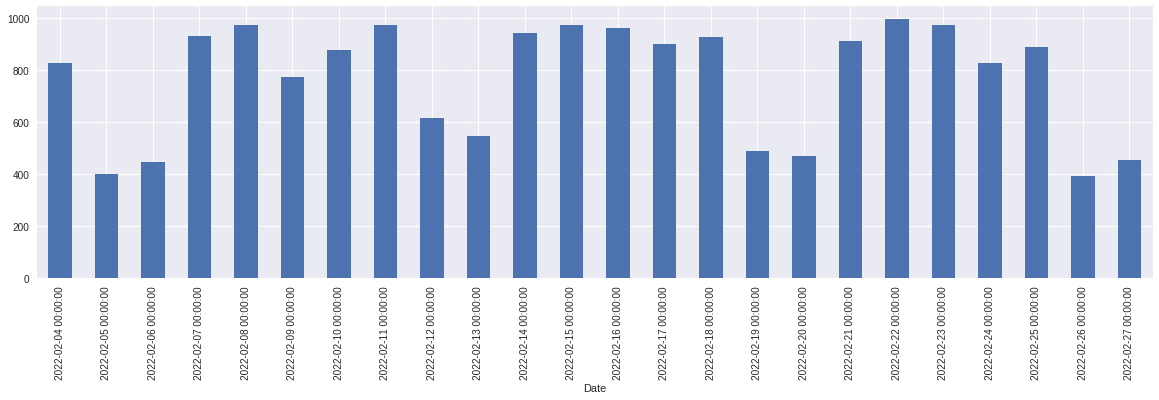

In [ ]:
AnalysisTeeetsPerDate = df[['Date']]
apd = AnalysisTeeetsPerDate.groupby(['Date']).size()
apd.plot(kind='bar',figsize=(20,5))

## Top 20 hashtags of all tweets

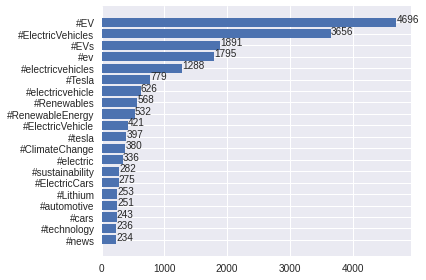

In [ ]:
# https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/
all_tweets = df['Text'].tolist()
all_terms_list = [word for line in all_tweets for word in line.split()]
# all_terms_dict = set(all_terms_list)

terms_hash = [term for term in all_terms_list if term.startswith('#')]

def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    dicti={}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        dicti[key]= value
    return dicti

freq_dict = CountFrequency(terms_hash)
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=False)
top_twenty_hash = sorted_freq_dict[-20:]

hashtag = []
frequ = []
for item in top_twenty_hash:
   hashtag.append(item[0])
   frequ.append(item[1])

# plt.xticks(rotation='vertical')
for index, value in enumerate(frequ):
    plt.text(value, index,
             str(value))
plt.barh(hashtag, frequ)
plt.tight_layout()
plt.savefig('hashtags.png', dpi=300)
plt.show()
plt.close()

## Top 20 mentions in all tweets

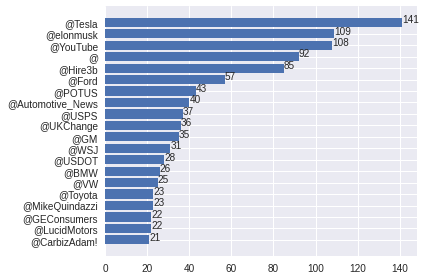

In [ ]:
# https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

terms_ment = [term for term in all_terms_list if term.startswith('@')]


freq_dict = CountFrequency(terms_ment)
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=False)
top_twenty_ment = sorted_freq_dict[-20:]

ment = []
frequ = []
for item in top_twenty_ment:
   ment.append(item[0])
   frequ.append(item[1])

# plt.xticks(rotation='vertical')
for index, value in enumerate(frequ):
    plt.text(value, index,
             str(value))
plt.barh(ment, frequ)
plt.tight_layout()
plt.savefig('mentions.png', dpi=300)
plt.show()
plt.close()

# Pre-Processing for Sentiment Analysis - Clean the Text

In [ ]:
# create function to clean the text

# https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
#Replacing apostrophes/short words
def decontracted(phrase):
  # with the apostroph -> ’
  phrase = re.sub(r"won\’t", "will not", phrase)
  phrase = re.sub(r"can\’t", "can not", phrase)
  phrase = re.sub(r"n\’t", " not", phrase)
  phrase = re.sub(r"\’re", " are", phrase)
  phrase = re.sub(r"\’s", " is", phrase)
  phrase = re.sub(r"\’d", " would", phrase)
  phrase = re.sub(r"\’ll", " will", phrase)
  phrase = re.sub(r"\’t", " not", phrase)
  phrase = re.sub(r"\’ve", " have", phrase)
  phrase = re.sub(r"\’m", " am", phrase)

  # with the apostroph -> '
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

def cleanText(text):
  text = text.lower() # Turn the whole text to lowercase
  text = decontracted(text) # Calling the above function
  # r tells python that is raw stream
  text = re.sub(r'@[a-z0-9]+', '', text) # Removes @mentions
  text = re.sub(r'#[a-z0-9]+', '', text) # Removes the hashtags
  text = re.sub(r'rt[\s]+', '', text) # Removes the RT
  text = re.sub(r'via','', text) # Removes via word prior the hyper link
  text = re.sub(r'https?:\/\/\S+', '', text) # Removes the hyper link
  text = re.sub(r'\W+',' ', text) # Removes any non word characters
  text = re.sub(r'amp','and', text) # Replaces 'amp' with 'and'
  text = re.sub(r'\w*\d\w*', '', text) # Removes words containing numbers
  text = re.sub(r' \d+', '', text) # Removes the digits that are not concatinated in words
  text = re.sub(r'\s$','', text) # Removes spaces at the end of line
  text = re.sub(r'^\s','', text) # Removes spaces at the beginning of line
  text = re.sub(r'_','',text) # Removes underscores
  text = re.sub(r'\s+',' ',text) # Replace all multiple white spaces with single white space
 
  return text

# Cleaning the text
df['Cleaned Text']=df['Text'].apply(cleanText)

# Show the cleaned text
# df.loc[300,'Cleaned Text']
df.head(80)

Tweet Id                                               Text  \
0   1.489751e+18  Cutting-edge gallium nitride tech could help #...   
1   1.489751e+18  Rattanindia Ent @ 57.00 /-\n\n #revolt #sustai...   
2   1.489750e+18  Utilities’ Carbon-Reduction Goals Will Have Li...   
3   1.489750e+18  Big Thanks to @CreativeMurdock! \n\nGreat art ...   
4   1.489750e+18  Hurts me to post this (sorry fellow Tesla driv...   
..           ...                                                ...   
75  1.489728e+18  Artist Michael Doyle brings us to the edge of ...   
76  1.489727e+18  If Detroit can build an experimental road that...   
77  1.489726e+18  France's January plugin #electricvehicles shar...   
78  1.489726e+18  The first week in February has been full of ex...   
79  1.489726e+18  Sweden in January: The country has now flipped...   

         Date                Location  \
0  2022-02-04                     NaN   
1  2022-02-04  Bengaluru South, India   
2  2022-02-04                     NaN   
3  2022-02-04                     NaN   
4  2022-02-04                     NaN   
..        ...                     ...   
75 2022-02-04                     NaN   
76 2022-02-04                     NaN   
77 2022-02-04                     NaN   
78 2022-02-04                     NaN   
79 2022-02-04                     NaN   

                                         Cleaned Text  
0   cutting edge gallium nitride tech could help c...  
1                                  rattanindia ent in  
2   utilities carbon reduction goals will have lit...  
3   big thanks to great awork to keep us inspired ...  
4   hurts me to post this sorry fellow tesla drive...  
..                                                ...  
75  artist michael doyle brings us to the edge of ...  
76  if detroit can build an experimental road that...  
77  france is january plugin share at with full el...  
78  the first week in february has been full of ex...  
79  sweden in january the country has now flipped ...  

[80 rows x 5 columns]

## Removing the Duplicates

In [ ]:
df = df.drop_duplicates(subset='Cleaned Text', keep="last")
#What is the shape of the dataset
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 15603 rows and 5 columns


## World Cloud of all the tweets

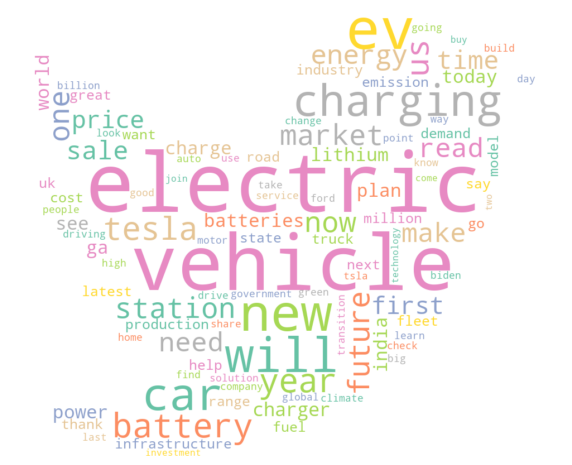

In [ ]:
# Plot World Cloud
allWords = ' '.join( [twts for twts in df['Cleaned Text']] ) # Join all words of the tweets in one string
from PIL import Image
mask = np.array(Image.open('twitter_mask.png'))

# # wordCloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2',mask=mask ,collocations=False).generate(allWords)
wordCloud = WordCloud(random_state=1, background_color='white', max_words=100, colormap='Set2',mask=mask,collocations=False).generate(allWords)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off') # we remove the axes
plt.savefig('all_tweets_fig', dpi=300)
plt.show()

# Sentiment Analysis

## Classifying Tweets to 'Positive', 'Negative' and 'Neutral'

In [ ]:
# https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

# Using a specific model for sentiment analysis
sentiment_analysis_model = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")

#Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive
def sentimentAnalysis(text):
  sentimentAnalysis.counter += 1
  print(sentimentAnalysis.counter)
  if sentiment_analysis_model(text)[0]['label'] == 'LABEL_2':
    return 'Positive'
  elif sentiment_analysis_model(text)[0]['label'] == 'LABEL_0':
    return 'Negative'
  else:
    return 'Neutral'
sentimentAnalysis.counter = 0
df['Sentiment Analysis'] = df['Cleaned Text'].apply(sentimentAnalysis)

Downloading:   0%|          | 0.00/970 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
1

In [ ]:
df.head(60)

Tweet Id                                               Text  \
1   1.489751e+18  Rattanindia Ent @ 57.00 /-\n\n #revolt #sustai...   
3   1.489750e+18  Big Thanks to @CreativeMurdock! \n\nGreat art ...   
4   1.489750e+18  Hurts me to post this (sorry fellow Tesla driv...   
6   1.489749e+18  “New analysis from Atlas Public Policy finds e...   
7   1.489749e+18  It’s tax season! Did you know that there are a...   
8   1.489749e+18  From bills aimed at promoting electric vehicle...   
9   1.489748e+18  Inergency\nThe ambition loop in motion for ele...   
10  1.489748e+18  detroit: we will build one (1) mile of electri...   
11  1.489747e+18  “I believe the decarbonizing of the global eco...   
14  1.489746e+18  Norway loves the Audi Q4 e-tron! #ElectricVehi...   
15  1.489746e+18  Cool drone shot for DYU V1💥\nHappy Friday folk...   
16  1.489745e+18  Producing #lithium for #EVs https://t.co/rZB3V...   
17  1.489745e+18  Warren Says Powell 'Failed' as Leader (Podcast...   
18  1.489745e+18  Autel provides not only AC Wallbox for domesti...   
19  1.489745e+18  Why should you care about this?  Because it’s ...   
20  1.489744e+18  Converting the @usps fleet to electric vehicle...   
21  1.489744e+18  My new Volvo C40. The dealer tells me it was t...   
22  1.489744e+18  battery startup SES backed by car makers Honda...   
23  1.489744e+18  Hello everybody!! New video on $sx $SXOOF will...   
24  1.489743e+18  New website for Autel Maxicharger is coming so...   
25  1.489743e+18  Utilities’ Carbon-Reduction Goals Will Have Li...   
27  1.489743e+18  As #EVs become more mainstream, traditional au...   
28  1.489743e+18  Double-decker buses may run again in Pune, as ...   
29  1.489743e+18  Senators and members of the House write to @US...   
30  1.489742e+18  If you're one of those folks who thinks trucks...   
31  1.489742e+18  Gadget Game News : Ford will spend up to $20 b...   
32  1.489742e+18  A nice overview of $MMAT for new investors @Me...   
33  1.489741e+18  Yeh but will the @Tesla vehicle start &amp; ru...   
35  1.489741e+18  Heathrow charges vehicles a £5 to drop-off peo...   
36  1.489740e+18  Electric vehicles still have way more of a fut...   
37  1.489740e+18  NIO ES8 got a 5 out of 6 score when reviewed b...   
39  1.489739e+18  What the heck happened to the visualization? 😳...   
40  1.489739e+18  #EVs sales got to 20% of total in January. Imp...   
41  1.489738e+18  I start with EV today.  Full review coming soo...   
42  1.489738e+18  The trucker protests are the exact reason we n...   
44  1.489738e+18  #aviation startup aiming at same-day delivery ...   
47  1.489736e+18  RENO, Nev. (AP) — The U.S. Fish and Wildlife S...   
48  1.489736e+18  The #US government is pushing for the nation’s...   
49  1.489735e+18  Check out @IRECUSA's new report, Enabling Equi...   
50  1.489735e+18  Closing chart: Lithium Americas $LAC settled +...   
52  1.489735e+18  It's a bit ironic you use the word "supercharg...   
53  1.489734e+18  Maryland HB 835 would require at least one Lev...   
54  1.489733e+18  How Tesla Could Be Bigger Than Ford and GM—Com...   
55  1.489733e+18  New Delhi, one of the world's most polluted an...   
57  1.489733e+18  #EV charging stations are getting bigger, brig...   
59  1.489733e+18  Some of my thoughts - and of course some visua...   
60  1.489732e+18  29% of US greenhouse gas emissions come from t...   
61  1.489732e+18  Towards the end of 2020, the UK government ann...   
63  1.489732e+18  Which one are you taking? #tesla #ElonMusk #El...   
64  1.489731e+18  Ford to Spend Up to $20 Billion Reorganizing f...   
66  1.489731e+18  Support grows to overhaul presidential vote co...   
68  1.489730e+18  #Tesla #EV #ElectricVehicles Texas Gigafactory...   
69  1.489729e+18  EV Charging Stations in Ovilla, TX https://t.c...   
70  1.489729e+18  #DublinAirport #ev #chargers #DC #Circontrol #...   
71  1.489729e+18  The #Austrian province of #Styria is one of th...   
72  1.489729e+18  #ElectricVehic

## Explore Positive Tweets

In [ ]:
# Print all of the positive tweets

j=1
positive_tweets = df[df['Sentiment Analysis'] == 'Positive']['Cleaned Text']
for x in positive_tweets:
  print(str(j) +') '+x)
  print()
  j = j+1

Streaming output truncated to the last 5000 lines.
2599) season brought you one of our very few electric vehicles here is a look at dee snider is tesla that we painted for him this thing turned out great there are not many tesla is that are this nice

2600) a package of incentives has been approved by the cabinet to encourage the transition to electric vehicles evs and increase domestic production see more ประเทศไทย รถยนต ไฟฟ า เศรษฐก จ รถยนต

2601) sales of are booming across the uk but is a battery powered car the right choice for you has produced this handy guide

2602) with evs you can always enjoy a sweet and silent ride

2603) both a great and inspirational quote

2604) nearly million electric vehicles evs including fully electric and plug in hybrid passenger cars were sold worldwide in up per cent from with tesla leading the global ev marketa with per cent share

2605) where is the opportunity for with electric vehicles both fully electric and plug in hybrid evs look set to beco

## Wordcloud with positive tweets

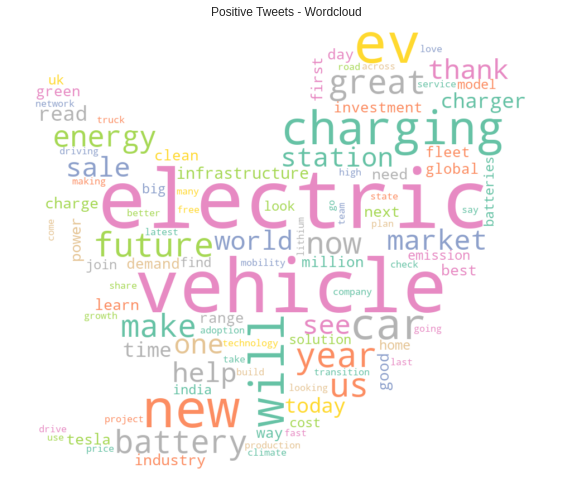

In [ ]:
positive_tweets = df['Cleaned Text'][df["Sentiment Analysis"] == 'Positive']
positive_tweets_gen = ' '.join( [twts for twts in positive_tweets]) # Join all words of the tweets in one string
positive_wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, max_words=100, background_color='white', colormap='Set2',mask=mask, collocations=False).generate(positive_tweets_gen)
plt.figure(figsize = (10, 10), facecolor = None)
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('positive_tweets_fig', dpi=300)
plt.show()

## Negative Tweets

In [ ]:
j=1
negative_tweets = df[df['Sentiment Analysis'] == 'Negative']['Cleaned Text']
for x in negative_tweets:
    print(str(j) +') '+x)
    print()
    j = j+1

1) hurts me to post this sorry fellow tesla driver but come on but i feel like i have to do not be this type of driver

2) detroit we will build one mile of electrified road to charge electric vehicles but if you want your street plowed for your regular vehicle fuckin forget it

3) warren says powell failed as leader podcast bloomberg

4) why should you care about this because it is your tax dollars paying for the millions of gallons of fuel it is your lungs inhaling and if these were electric they would instantly be more efficient and reduce maintenance ten fold

5) what the heck happened to the visualization

6) the trucker protests are the exact reason we need to resist against electric vehicles and driverless systems once established they will transfer to centralised controls and will be used to impact your freedom

7) it is a bit ironic you use the word supercharging mr president why do you snub a truly american and the true leader in electric vehicles in tesla of course a lot of 

## Wordcloud with negative tweets

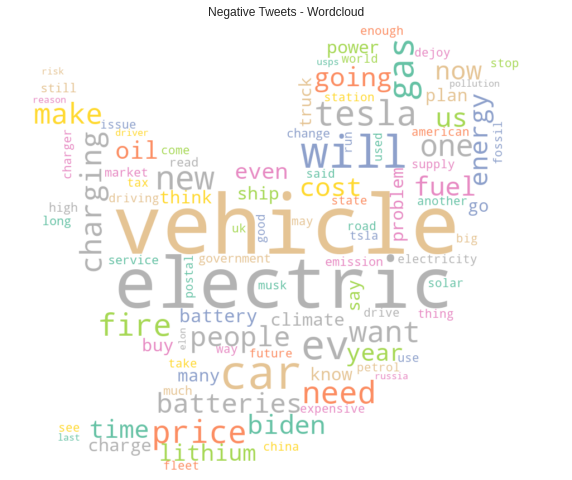

In [ ]:
negative_tweets = df['Cleaned Text'][df["Sentiment Analysis"] == 'Negative']
negative_tweets_gen = ' '.join( [twts for twts in negative_tweets]) # Join all words of the tweets in one string
negative_wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, max_words=100, background_color='white', colormap='Set2',mask=mask, collocations=False).generate(negative_tweets_gen)
plt.figure(figsize = (10, 10), facecolor = None)
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('negative_tweets_fig', dpi=300)
plt.show()

## Sentiment Vizualisation Pie Chart + Percentages

Sentiment Analysis
Negative    1505
Neutral     9000
Positive    5098
dtype: int64


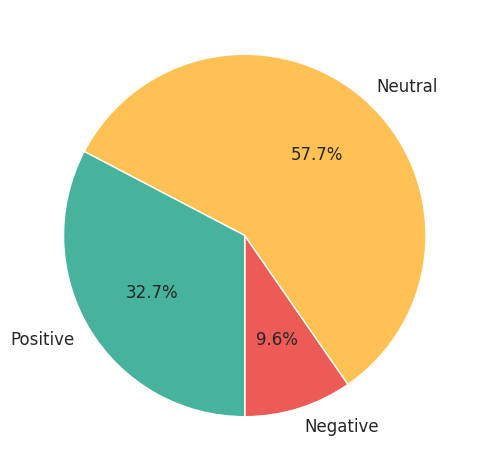

In [ ]:
sentiment_counts = df.groupby(['Sentiment Analysis']).size() # Counting the positive, negative and neutral tweets
print(sentiment_counts)

#Visualizing the setiments
colors = ['#EC5B56', '#FFC154', '#47B39C']
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="", colors=colors)
fig.savefig('setiment_visualisation_pie.png', dpi=300)

## Sentiment Vizualisation overtime

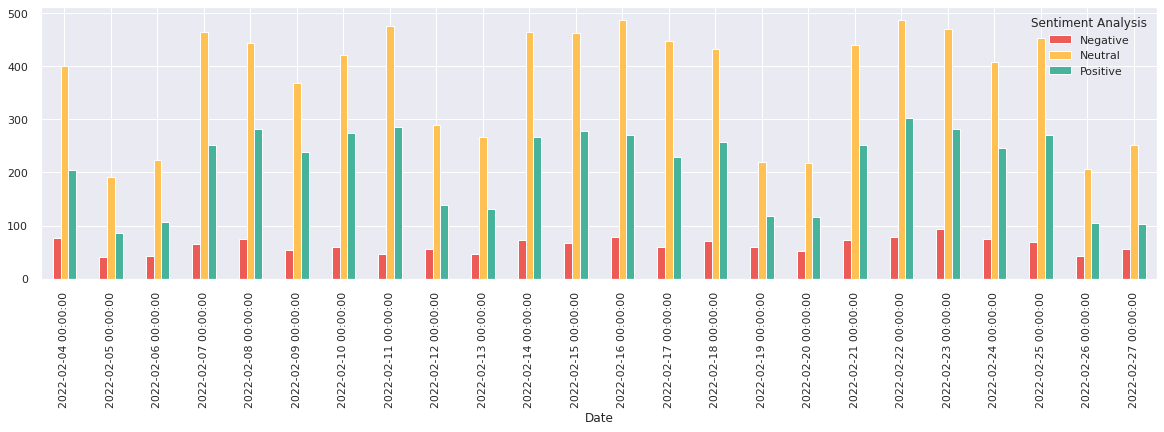

In [ ]:
AnalysisPerDate = df[['Date','Sentiment Analysis']]
apd = AnalysisPerDate.groupby(['Date','Sentiment Analysis']).size()
colors = ['#EC5B56', '#FFC154', '#47B39C']
apd.unstack('Sentiment Analysis').plot(kind='bar',color=colors, figsize=(20,5))


# Pre-processing of the tweets for LDA Topic Modelling

## Tokenization of the cleaned text

In [ ]:
def tokenize(text):
    tokens = re.split(r'\W+', text)
    return tokens

df['Cleaned Text Tokenized'] = df['Cleaned Text'].apply(lambda x: tokenize(x.lower()))

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Tweet Id                                               Text       Date  \
1  1.489751e+18  Rattanindia Ent @ 57.00 /-\n\n #revolt #sustai... 2022-02-04   
3  1.489750e+18  Big Thanks to @CreativeMurdock! \n\nGreat art ... 2022-02-04   
4  1.489750e+18  Hurts me to post this (sorry fellow Tesla driv... 2022-02-04   
6  1.489749e+18  “New analysis from Atlas Public Policy finds e... 2022-02-04   
7  1.489749e+18  It’s tax season! Did you know that there are a... 2022-02-04   

                 Location                                       Cleaned Text  \
1  Bengaluru South, India                                 rattanindia ent in   
3                     NaN  big thanks to great awork to keep us inspired ...   
4                     NaN  hurts me to post this sorry fellow tesla drive...   
6                     NaN  new analysis from atlas public policy finds el...   
7                     NaN  it is tax season did you know that there are a...   

  Sentiment Analysis                             Cleaned Text Tokenized  
1            Neutral                             [rattanindia, ent, in]  
3           Positive  [big, thanks, to, great, awork, to, keep, us, ...  
4           Negative  [hurts, me, to, post, this, sorry, fellow, tes...  
6           Positive  [new, analysis, from, atlas, public, policy, f...  
7           Positive  [it, is, tax, season, did, you, know, that, th...

## Remove stopwords from the tokenized cleaned text

In [ ]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

df['Cleaned Text NoStop'] = df['Cleaned Text Tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Tweet Id                                               Text       Date  \
1  1.489751e+18  Rattanindia Ent @ 57.00 /-\n\n #revolt #sustai... 2022-02-04   
3  1.489750e+18  Big Thanks to @CreativeMurdock! \n\nGreat art ... 2022-02-04   
4  1.489750e+18  Hurts me to post this (sorry fellow Tesla driv... 2022-02-04   
6  1.489749e+18  “New analysis from Atlas Public Policy finds e... 2022-02-04   
7  1.489749e+18  It’s tax season! Did you know that there are a... 2022-02-04   

                 Location                                       Cleaned Text  \
1  Bengaluru South, India                                 rattanindia ent in   
3                     NaN  big thanks to great awork to keep us inspired ...   
4                     NaN  hurts me to post this sorry fellow tesla drive...   
6                     NaN  new analysis from atlas public policy finds el...   
7                     NaN  it is tax season did you know that there are a...   

  Sentiment Analysis                             Cleaned Text Tokenized  \
1            Neutral                             [rattanindia, ent, in]   
3           Positive  [big, thanks, to, great, awork, to, keep, us, ...   
4           Negative  [hurts, me, to, post, this, sorry, fellow, tes...   
6           Positive  [new, analysis, from, atlas, public, policy, f...   
7           Positive  [it, is, tax, season, did, you, know, that, th...   

                                 Cleaned Text NoStop  
1                                 [rattanindia, ent]  
3  [big, thanks, great, awork, keep, us, inspired...  
4  [hurts, post, sorry, fellow, tesla, driver, co...  
6  [new, analysis, atlas, public, policy, finds, ...  
7  [tax, season, know, sorts, state, federal, reb...

## Wordnet Lemmetizer

In [ ]:
# wn = nltk.WordNetLemmatizer()
# def lemmatizing(tokenized_text):
#     text = [wn.lemmatize(word) for word in tokenized_text]
#     return text

# df['Clean Text NoStop Lemmatized'] = df['Cleaned Text NoStop'].apply(lambda x: lemmatizing(x))

# df.head(8)


def getWordnetPos(word):
    posTag = nltk.pos_tag([word])[0][1][0].upper()
    tagDict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tagDict.get(posTag, wordnet.NOUN)

wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word, getWordnetPos(word)) for word in tokenized_text if word]
    return text
  
df['Clean Text NoStop Lemmatized'] = df['Cleaned Text NoStop'].apply(lambda x: lemmatizing(x))

df.head(8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Tweet Id                                               Text  \
1   1.489751e+18  Rattanindia Ent @ 57.00 /-\n\n #revolt #sustai...   
3   1.489750e+18  Big Thanks to @CreativeMurdock! \n\nGreat art ...   
4   1.489750e+18  Hurts me to post this (sorry fellow Tesla driv...   
6   1.489749e+18  “New analysis from Atlas Public Policy finds e...   
7   1.489749e+18  It’s tax season! Did you know that there are a...   
8   1.489749e+18  From bills aimed at promoting electric vehicle...   
9   1.489748e+18  Inergency\nThe ambition loop in motion for ele...   
10  1.489748e+18  detroit: we will build one (1) mile of electri...   

         Date                Location  \
1  2022-02-04  Bengaluru South, India   
3  2022-02-04                     NaN   
4  2022-02-04                     NaN   
6  2022-02-04                     NaN   
7  2022-02-04                     NaN   
8  2022-02-04                     NaN   
9  2022-02-04                     NaN   
10 2022-02-04                     NaN   

                                         Cleaned Text Sentiment Analysis  \
1                                  rattanindia ent in            Neutral   
3   big thanks to great awork to keep us inspired ...           Positive   
4   hurts me to post this sorry fellow tesla drive...           Negative   
6   new analysis from atlas public policy finds el...           Positive   
7   it is tax season did you know that there are a...           Positive   
8   from bills aimed at promoting electric vehicle...           Positive   
9   inergency the ambition loop in motion for elec...            Neutral   
10  detroit we will build one mile of electrified ...           Negative   

                               Cleaned Text Tokenized  \
1                              [rattanindia, ent, in]   
3   [big, thanks, to, great, awork, to, keep, us, ...   
4   [hurts, me, to, post, this, sorry, fellow, tes...   
6   [new, analysis, from, atlas, public, policy, f...   
7   [it, is, tax, season, did, you, know, that, th...   
8   [from, bills, aimed, at, promoting, electric, ...   
9   [inergency, the, ambition, loop, in, motion, f...   
10  [detroit, we, will, build, one, mile, of, elec...   

                                  Cleaned Text NoStop  \
1                                  [rattanindia, ent]   
3   [big, thanks, great, awork, keep, us, inspired...   
4   [hurts, post, sorry, fellow, tesla, driver, co...   
6   [new, analysis, atlas, public, policy, finds, ...   
7   [tax, season, know, sorts, state, federal, reb...   
8   [bills, aimed, promoting, electric, vehicles, ...   
9   [inergency, ambition, loop, motion, electric, ...   
10  [detroit, build, one, mile, electrified, road,...   

                         Clean Text NoStop Lemmatized  
1                                  [rattanindia, ent]  
3   [big, thanks, great, awork, keep, u, inspire, ...  
4   [hurt, post, sorry, fellow, tesla, driver, com...  
6   [new, analysis, atlas, public, policy, find, e...  
7   [tax, season, know, sort, state, federal, reba...  
8   [bill, aim, promote, electric, vehicle, carbon...  
9   [inergency, ambition, loop, motion, electric, ...  
10  [detroit, build, one, mile, electrify, road, c...

## Tokenize lists for Positive and Negative tweets
The two lists will be used later in the Biagrams and Triagrams

In [ ]:
# Tokenize list for positive tweets
tokenize_list_positive=[]
for tweet in df['Clean Text NoStop Lemmatized'][df['Sentiment Analysis'] == 'Positive']:
    tokenize_list_positive.append(tweet)
    
print('Positive tokenize list')
print(len(tokenize_list_positive))
print(tokenize_list_positive[:3]) 


# Tokenize list for negative tweets
tokenize_list_negative=[]
for tweet in df['Clean Text NoStop Lemmatized'][df['Sentiment Analysis'] == 'Negative']:
    tokenize_list_negative.append(tweet)
    
print('Negative tokenize list') 
print(len(tokenize_list_negative))
print(tokenize_list_negative[:3])

Positive tokenize list
5098
[['big', 'thanks', 'great', 'awork', 'keep', 'u', 'inspire', 'invest', 'journey'], ['new', 'analysis', 'atlas', 'public', 'policy', 'find', 'electric', 'car', 'truck', 'cost', 'less', 'popular', 'vehicle', 'u'], ['tax', 'season', 'know', 'sort', 'state', 'federal', 'rebate', 'tax', 'incentive', 'electric', 'vehicle', 'owner', 'lessee', 'even', 'specific', 'san', 'francisco', 'area', 'go', 'green', 'definitely', 'get', 'grin', 'ear', 'ear']]
Negative tokenize list
1505
[['hurt', 'post', 'sorry', 'fellow', 'tesla', 'driver', 'come', 'feel', 'like', 'type', 'driver'], ['detroit', 'build', 'one', 'mile', 'electrify', 'road', 'charge', 'electric', 'vehicle', 'want', 'street', 'plow', 'regular', 'vehicle', 'fuckin', 'forget'], ['warren', 'say', 'powell', 'fail', 'leader', 'podcast', 'bloomberg']]


## Bigrams and Trigrams

In [ ]:
# Function that returns the tokenze)list with bigrams and trigrams
def bigram_trigram(tokenize_list):
    
    bigram_phrases = gensim.models.Phrases(tokenize_list, min_count=5, threshold=100)
    trigram_phrases = gensim.models.Phrases(bigram_phrases[tokenize_list], threshold=100)

    bigram = gensim.models.phrases.Phraser(bigram_phrases)
    trigram = gensim.models.phrases.Phraser(trigram_phrases)

    data_bigrams = [bigram[doc] for doc in tokenize_list]
    data_bigrams_trigrams = [trigram[bigram[doc]] for doc in data_bigrams]
    
    return data_bigrams_trigrams

# Positive tokenize list
positive_bigrams_trigrams = bigram_trigram(tokenize_list_positive)
print(len(positive_bigrams_trigrams))
print (positive_bigrams_trigrams)

# Negative tokenize list
negative_bigrams_trigrams = bigram_trigram(tokenize_list_negative)
print(len(negative_bigrams_trigrams))
print (negative_bigrams_trigrams[:2])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


5098
[['big', 'thanks', 'great', 'awork', 'keep', 'u', 'inspire', 'invest', 'journey'], ['new', 'analysis', 'atlas', 'public', 'policy', 'find', 'electric', 'car', 'truck', 'cost', 'less', 'popular', 'vehicle', 'u'], ['tax', 'season', 'know', 'sort', 'state', 'federal', 'rebate', 'tax', 'incentive', 'electric', 'vehicle', 'owner', 'lessee', 'even', 'specific', 'san_francisco', 'area', 'go', 'green', 'definitely', 'get', 'grin', 'ear', 'ear'], ['bill', 'aim', 'promote', 'electric', 'vehicle', 'carbon', 'tax', 'key', 'piece', 'legislation', 'expect', 'clean', 'air', 'caucus', 'legislative', 'session'], ['believe', 'decarbonize', 'global', 'economy', 'go', 'create', 'great', 'investment', 'opportunity', 'lifetime', 'larry', 'fink', 'ceo', 'blackrock', 'solar', 'energy', 'wind', 'energy', 'nuclear', 'energy', 'electric', 'vehicle', 'lac', 'tsla', 'bwen', 'nue', 'sirc', 'enph', 'uec', 'uuuu'], ['norway', 'love', 'audi', 'e', 'tron'], ['cool', 'drone', 'shot', 'dyu', 'happy', 'friday', 'folk

# Create the Dictionary and Corpus needed for Topic Modeling

In [ ]:
# Create id2word dictionary fot the positive and negative tokenized lists
positive_id2word = corpora.Dictionary(positive_bigrams_trigrams)
negative_id2word = corpora.Dictionary(negative_bigrams_trigrams)

print(positive_id2word)
print(negative_id2word)

#positive and negative tokenized lists
positive_texts = positive_bigrams_trigrams
negative_texts = negative_bigrams_trigrams

#Creating the corpus objects fot the positive and negative tweets
positive_corpus = [positive_id2word.doc2bow(text) for text in positive_texts]
negative_corpus = [negative_id2word.doc2bow(text) for text in negative_texts]

# print (positive_corpus[0][0:20])
print(len(positive_corpus))
print(positive_corpus)
print(len(negative_corpus))
print(negative_corpus)

[[(positive_id2word[id], freq) for id, freq in cp] for cp in positive_corpus[:4]] 


Dictionary(8522 unique tokens: ['awork', 'big', 'great', 'inspire', 'invest']...)
Dictionary(4549 unique tokens: ['come', 'driver', 'feel', 'fellow', 'hurt']...)
5098
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(13, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2)], [(13, 1), (21, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(2, 1), (13, 1), (21, 1), (28, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 3), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(79, 1), (80, 1), (81, 1), (82, 

[[('awork', 1),
  ('big', 1),
  ('great', 1),
  ('inspire', 1),
  ('invest', 1),
  ('journey', 1),
  ('keep', 1),
  ('thanks', 1),
  ('u', 1)],
 [('u', 1),
  ('analysis', 1),
  ('atlas', 1),
  ('car', 1),
  ('cost', 1),
  ('electric', 1),
  ('find', 1),
  ('less', 1),
  ('new', 1),
  ('policy', 1),
  ('popular', 1),
  ('public', 1),
  ('truck', 1),
  ('vehicle', 1)],
 [('electric', 1),
  ('vehicle', 1),
  ('area', 1),
  ('definitely', 1),
  ('ear', 2),
  ('even', 1),
  ('federal', 1),
  ('get', 1),
  ('go', 1),
  ('green', 1),
  ('grin', 1),
  ('incentive', 1),
  ('know', 1),
  ('lessee', 1),
  ('owner', 1),
  ('rebate', 1),
  ('san_francisco', 1),
  ('season', 1),
  ('sort', 1),
  ('specific', 1),
  ('state', 1),
  ('tax', 2)],
 [('electric', 1),
  ('vehicle', 1),
  ('tax', 1),
  ('aim', 1),
  ('air', 1),
  ('bill', 1),
  ('carbon', 1),
  ('caucus', 1),
  ('clean', 1),
  ('expect', 1),
  ('key', 1),
  ('legislation', 1),
  ('legislative', 1),
  ('piece', 1),
  ('promote', 1),
  ('sess

# Topic Modeling using LDA Mallet Model

## Importing Machine learning for language toolkit (Mallet)

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-04-13 08:55:54--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-04-13 08:55:54--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  7.34MB/s    in 2.1s    

2022-04-13 08:55:56 (7.34 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [ ]:
import os.path
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' 

## Positive LDA Mallet Model

### Computing Coherence values corresponding to the LDA model with respective number of topics

In [ ]:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
positive_model_list, positive_coherence_values = compute_coherence_values(dictionary=positive_id2word, corpus=positive_corpus, texts=positive_texts, start=2, limit=40, step=6)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is

### Graph of Coherence Scores x Num of Topics

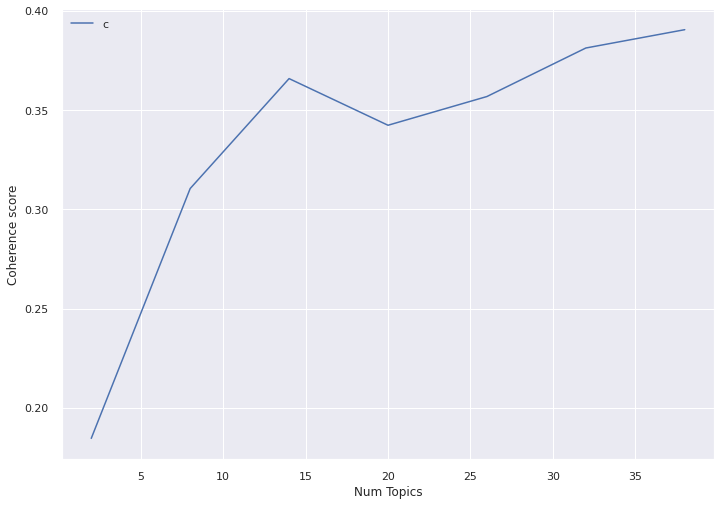

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, positive_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### The Coherence Scores of every model



In [ ]:
# Print the coherence scores
for m, cv in zip(x, positive_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1846
Num Topics = 8  has Coherence Value of 0.3104
Num Topics = 14  has Coherence Value of 0.3658
Num Topics = 20  has Coherence Value of 0.3423
Num Topics = 26  has Coherence Value of 0.3568
Num Topics = 32  has Coherence Value of 0.3812
Num Topics = 38  has Coherence Value of 0.3904


### Selecting model and showing the topics




In [ ]:
# Select the model and print the topics
optimal_model = positive_model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.139*"car" + 0.049*"electric" + 0.033*"read" + 0.032*"model" + 0.021*"top" '
  '+ 0.021*"motor" + 0.015*"commercial" + 0.014*"save" + 0.013*"buy" + '
  '0.012*"fully"'),
 (1,
  '0.189*"charge" + 0.078*"ev" + 0.049*"station" + 0.048*"charger" + '
  '0.038*"infrastructure" + 0.028*"home" + 0.027*"fast" + 0.026*"road" + '
  '0.024*"network" + 0.023*"state"'),
 (2,
  '0.078*"future" + 0.052*"world" + 0.038*"work" + 0.027*"check" + '
  '0.025*"mobility" + 0.025*"city" + 0.022*"sustainable" + '
  '0.018*"transportation" + 0.015*"partner" + 0.014*"ready"'),
 (3,
  '0.047*"technology" + 0.041*"industry" + 0.040*"big" + 0.028*"project" + '
  '0.027*"india" + 0.022*"auto" + 0.019*"development" + 0.018*"set" + '
  '0.016*"ford" + 0.015*"automotive"'),
 (4,
  '0.330*"electric" + 0.288*"vehicle" + 0.014*"innovation" + 0.011*"research" '
  '+ 0.008*"growth" + 0.006*"half" + 0.006*"cheaper" + 0.006*"nissan" + '
  '0.006*"mercedes_benz" + 0.005*"digital"'),
 (5,
  '0.056*"drive" + 0.035*"rang

### Dominant Topics with their percentage contribution

In [ ]:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

def positive_topics(ldamodel, corpus):
    # Init output
    df_positive_topics = pd.DataFrame()


    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                df_positive_topics = df_positive_topics.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    df_positive_topics.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    return(df_positive_topics)


# df_topic_sents_keywords = 
dominant_positive_topics = positive_topics(ldamodel=optimal_model, corpus=positive_corpus).groupby('Dominant_Topic')

df_dominant_positive_topics = pd.DataFrame()

for i, grp in dominant_positive_topics:
    df_dominant_positive_topics = pd.concat([df_dominant_positive_topics, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
df_dominant_positive_topics.reset_index(drop=True, inplace=True)

# Format
df_dominant_positive_topics.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords"]

# Show
df_dominant_positive_topics.head(20)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


Topic_Num  Topic_Perc_Contrib  \
0         0.0              0.2394   
1         1.0              0.2494   
2         2.0              0.2471   
3         3.0              0.2619   
4         4.0              0.2372   
5         5.0              0.2313   
6         6.0              0.1865   
7         7.0              0.2651   
8         8.0              0.2068   
9         9.0              0.2475   
10       10.0              0.2118   
11       11.0              0.2772   
12       12.0              0.2257   
13       13.0              0.2447   

                                             Keywords  
0   car, electric, read, model, top, motor, commer...  
1   charge, ev, station, charger, infrastructure, ...  
2   future, world, work, check, mobility, city, su...  
3   technology, industry, big, project, india, aut...  
4   electric, vehicle, innovation, research, growt...  
5   drive, range, love, late, article, full, exper...  
6   make, great, today, good, news, day, move, swi...  
7   company, investment, million, include, plan, b...  
8   ev, time, share, find, uk, interest, show, sel...  
9   ev, join, transition, consumer, back, step, re...  
10  electric, vehicle, tesla, power, green, truck,...  
11  battery, year, market, sale, high, increase, d...  
12  learn, fleet, solution, service, business, ele...  
13  energy, clean, cost, emission, reduce, benefit...

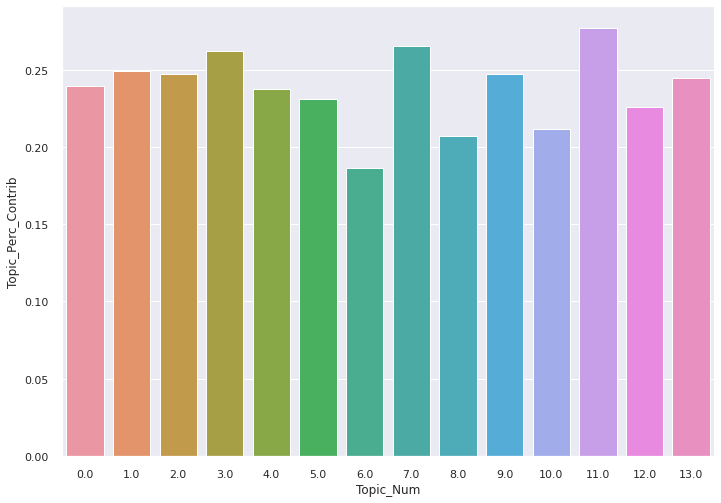

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
positive_perc_cont_topic_num = sns.barplot(x='Topic_Num',y='Topic_Perc_Contrib',data = df_dominant_positive_topics)

### WordCloud function for the Topics of Positive Tweets

In [ ]:
# https://stackoverflow.com/questions/54076679/how-to-generate-wordclouds-next-to-each-other-in-python
from google.colab import files
from matplotlib.pyplot import figure

def display_wordcloud(top_words, title, n_components):
    plt.figure(figsize=(20, 20), dpi=80)
    j = np.ceil(n_components/4)
    for t in range(n_components):
        i=t+1
        plt.subplot(j, 4, i).set_title("Topic #" + str(t))
        plt.plot()
        plt.imshow(WordCloud(background_color='white').generate(top_words[t]))
        plt.axis("off")
    fig.suptitle(title)
    plt.savefig('topics.png', dpi=300)
    plt.show()

car, electric, read, model, top, motor, commercial, save, buy, fully


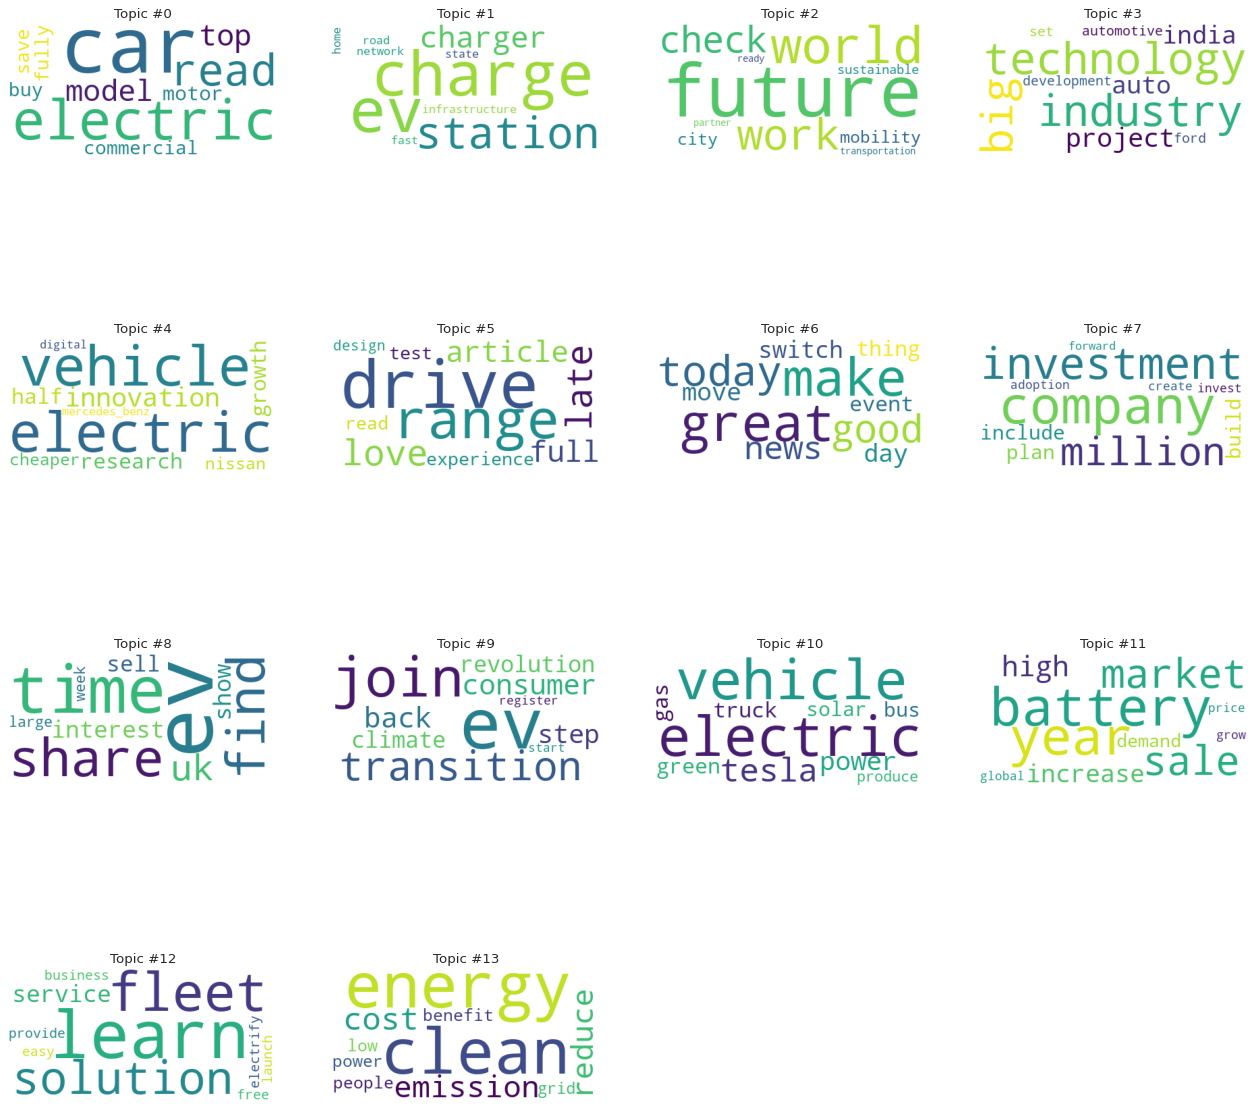

In [ ]:
topic = df_dominant_positive_topics.Keywords
print(topic[0])
display_wordcloud(topic, 'title', 14)

### How Topics of Positive Tweets Change Overtime 6 day periods

In [ ]:
positive_original_tweets = df[df['Sentiment Analysis'] == 'Positive']['Text']
data_positive = positive_original_tweets.values.tolist()
data_tweet_dates_positive = df[df['Sentiment Analysis'] == 'Positive']['Date'].apply(str)
data_positive_dates = data_tweet_dates_positive.values.tolist()

def format_topics_sentences(ldamodel, corpus, texts, dates):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    dates = pd.Series(dates)
    sent_topics_df = pd.concat([sent_topics_df, contents, dates], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=positive_corpus, texts=data_positive, dates=data_positive_dates)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Date']

# Show
df_dominant_topic

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0               0             6.0              0.0916   
1               1             0.0              0.1059   
2               2            10.0              0.1323   
3               3             7.0              0.1299   
4               4            13.0              0.1612   
...           ...             ...                 ...   
5093         5093             3.0              0.1066   
5094         5094             2.0              0.1431   
5095         5095             7.0              0.1279   
5096         5096             2.0              0.1071   
5097         5097             0.0              0.1025   

                                               Keywords  \
0     make, great, today, good, news, day, move, swi...   
1     car, electric, read, model, top, motor, commer...   
2     electric, vehicle, tesla, power, green, truck,...   
3     company, investment, million, include, plan, b...   
4     energy, clean, cost, emission, reduce, benefit...   
...                                                 ...   
5093  technology, industry, big, project, india, aut...   
5094  future, world, work, check, mobility, city, su...   
5095  company, investment, million, include, plan, b...   
5096  future, world, work, check, mobility, city, su...   
5097  car, electric, read, model, top, motor, commer...   

                                                   Text                 Date  
0     Big Thanks to @CreativeMurdock! \n\nGreat art ...  2022-02-04 00:00:00  
1     “New analysis from Atlas Public Policy finds e...  2022-02-04 00:00:00  
2     It’s tax season! Did you know that there are a...  2022-02-04 00:00:00  
3     From bills aimed at promoting electric vehicle...  2022-02-04 00:00:00  
4     “I believe the decarbonizing of the global eco...  2022-02-04 00:00:00  
...                                                 ...                  ...  
5093  Kenya Airways  will pilot electric vehicles th...  2022-02-27 00:00:00  
5094  Our SME today is @ElectrekE!\n\nElectrek Explo...  2022-02-27 00:00:00  
5095  ~ Mole Mobile - a single application for elect...  2022-02-27 00:00:00  
5096  I’ve seen the future ⚡️⚡️ #mustangmache #f150l...  2022-02-27 00:00:00  
5097  It’s great to see an increase in #ElectricVehi...  2022-02-27 00:00:00  

[5098 rows x 6 columns]

In [ ]:
conditions = [
    (df_dominant_topic['Date'] == '2022-02-04 00:00:00') | (df_dominant_topic['Date'] == '2022-02-05 00:00:00') | (df_dominant_topic['Date'] == '2022-02-06 00:00:00') |
    (df_dominant_topic['Date'] == '2022-02-07 00:00:00') | (df_dominant_topic['Date'] == '2022-02-08 00:00:00') | (df_dominant_topic['Date'] == '2022-02-09 00:00:00'),
    (df_dominant_topic['Date'] == '2022-02-10 00:00:00') | (df_dominant_topic['Date'] == '2022-02-11 00:00:00') | (df_dominant_topic['Date'] == '2022-02-12 00:00:00')|
    (df_dominant_topic['Date'] == '2022-02-13 00:00:00') | (df_dominant_topic['Date'] == '2022-02-14 00:00:00') | (df_dominant_topic['Date'] == '2022-02-15 00:00:00'),
    (df_dominant_topic['Date'] == '2022-02-16 00:00:00') | (df_dominant_topic['Date'] == '2022-02-17 00:00:00') | (df_dominant_topic['Date'] == '2022-02-18 00:00:00')|
    (df_dominant_topic['Date'] == '2022-02-19 00:00:00') | (df_dominant_topic['Date'] == '2022-02-20 00:00:00') | (df_dominant_topic['Date'] == '2022-02-21 00:00:00'),
    (df_dominant_topic['Date'] == '2022-02-22 00:00:00') | (df_dominant_topic['Date'] == '2022-02-23 00:00:00') | (df_dominant_topic['Date'] == '2022-02-24 00:00:00')|
    (df_dominant_topic['Date'] == '2022-02-25 00:00:00') | (df_dominant_topic['Date'] == '2022-02-26 00:00:00') | (df_dominant_topic['Date'] == '2022-02-27 00:00:00'),
    ]

# create a list of the values we want to assign for each condition
values=['4/2-9/2','10/2-15/2','16/2-21/2','22/2-27/2']
# create a new column and use np.select to assign values to it using our lists as arguments
df_dominant_topic['6_Day_Period'] = np.select(conditions, values)


df_dominant_topic

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0               0             6.0              0.0916   
1               1             0.0              0.1059   
2               2            10.0              0.1323   
3               3             7.0              0.1299   
4               4            13.0              0.1612   
...           ...             ...                 ...   
5093         5093             3.0              0.1066   
5094         5094             2.0              0.1431   
5095         5095             7.0              0.1279   
5096         5096             2.0              0.1071   
5097         5097             0.0              0.1025   

                                               Keywords  \
0     make, great, today, good, news, day, move, swi...   
1     car, electric, read, model, top, motor, commer...   
2     electric, vehicle, tesla, power, green, truck,...   
3     company, investment, million, include, plan, b...   
4     energy, clean, cost, emission, reduce, benefit...   
...                                                 ...   
5093  technology, industry, big, project, india, aut...   
5094  future, world, work, check, mobility, city, su...   
5095  company, investment, million, include, plan, b...   
5096  future, world, work, check, mobility, city, su...   
5097  car, electric, read, model, top, motor, commer...   

                                                   Text                 Date  \
0     Big Thanks to @CreativeMurdock! \n\nGreat art ...  2022-02-04 00:00:00   
1     “New analysis from Atlas Public Policy finds e...  2022-02-04 00:00:00   
2     It’s tax season! Did you know that there are a...  2022-02-04 00:00:00   
3     From bills aimed at promoting electric vehicle...  2022-02-04 00:00:00   
4     “I believe the decarbonizing of the global eco...  2022-02-04 00:00:00   
...                                                 ...                  ...   
5093  Kenya Airways  will pilot electric vehicles th...  2022-02-27 00:00:00   
5094  Our SME today is @ElectrekE!\n\nElectrek Explo...  2022-02-27 00:00:00   
5095  ~ Mole Mobile - a single application for elect...  2022-02-27 00:00:00   
5096  I’ve seen the future ⚡️⚡️ #mustangmache #f150l...  2022-02-27 00:00:00   
5097  It’s great to see an increase in #ElectricVehi...  2022-02-27 00:00:00   

     6_Day_Period  
0         4/2-9/2  
1         4/2-9/2  
2         4/2-9/2  
3         4/2-9/2  
4         4/2-9/2  
...           ...  
5093    22/2-27/2  
5094    22/2-27/2  
5095    22/2-27/2  
5096    22/2-27/2  
5097    22/2-27/2  

[5098 rows x 7 columns]

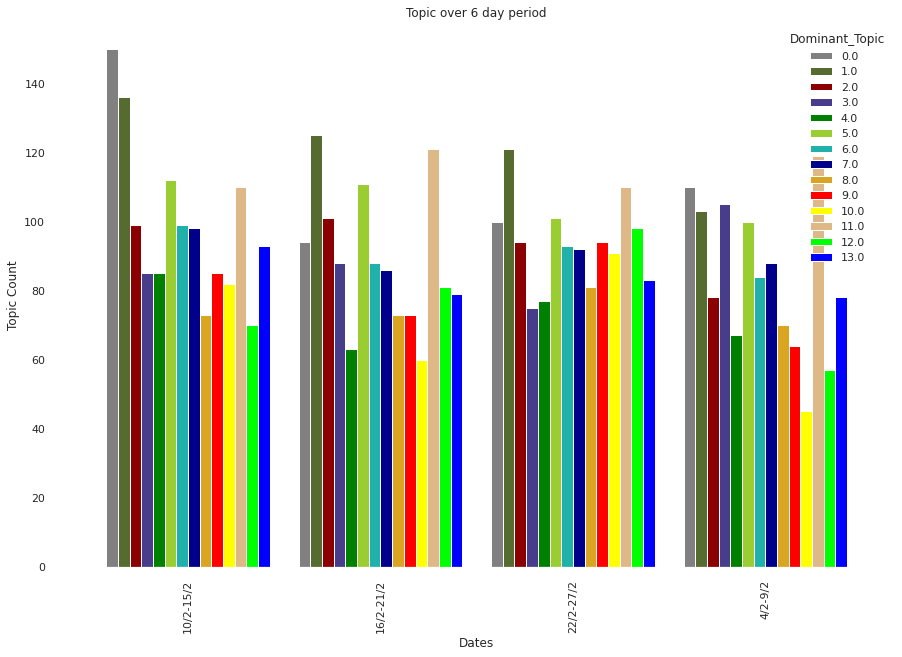

In [ ]:
df_topics_overtime = df_dominant_topic[['Dominant_Topic','6_Day_Period']]
ax_topics_over_6_day_period = df_topics_overtime.groupby(['6_Day_Period','Dominant_Topic']).size().unstack('Dominant_Topic',fill_value=0)
color_pallette = ['#808080', '#556b2f', '#8b0000', '#483d8b', '#008000', '#9acd32', '#20b2aa', '#00008b', '#daa520', '#ff0000', '#ffff00',
                  '#deb887', '#00ff00', '#0000ff', '#00ffff', '#ff7f50', '#ff00ff', '#1e90ff', '#db7093', '#ff1493','#ee82ee','#87cefa','#ffe4b5','#ff8c00','#a0522d','#d3d3d3']
P_6 = ax_topics_over_6_day_period.plot(kind='bar', figsize=(15,10),title='Topic over 6 day period', color = color_pallette,
                                 xlabel='Dates', ylabel='Topic Count', width=0.85)
P_6.set_facecolor('#ffffff')

In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()


sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text", "Dates"]

# Show
sent_topics_sorteddf_mallet.head(100)

Topic_Num  Topic_Perc_Contrib  \
0         0.0              0.2394   
1         0.0              0.2140   
2         0.0              0.1920   
3         0.0              0.1859   
4         0.0              0.1849   
..        ...                 ...   
65       13.0              0.2447   
66       13.0              0.2437   
67       13.0              0.2242   
68       13.0              0.2224   
69       13.0              0.2118   

                                             Keywords  \
0   car, electric, read, model, top, motor, commer...   
1   car, electric, read, model, top, motor, commer...   
2   car, electric, read, model, top, motor, commer...   
3   car, electric, read, model, top, motor, commer...   
4   car, electric, read, model, top, motor, commer...   
..                                                ...   
65  energy, clean, cost, emission, reduce, benefit...   
66  energy, clean, cost, emission, reduce, benefit...   
67  energy, clean, cost, emission, reduce, benefit...   
68  energy, clean, cost, emission, reduce, benefit...   
69  energy, clean, cost, emission, reduce, benefit...   

                                                 Text                Dates  
0   Some great Superbowl #EV commercials. Which on...  2022-02-14 00:00:00  
1   De Avocado Luxury &amp; Smart Homes \n\n📍Locat...  2022-02-27 00:00:00  
2   ArsTechnic - Cars\n\nThe best and worst car co...  2022-02-14 00:00:00  
3   Why electric vehicles are so hot in the 2022 S...  2022-02-13 00:00:00  
4   Between action-packed films, Greek gods and ro...  2022-02-14 00:00:00  
..                                                ...                  ...  
65  NSBA | White House Touts Clean Manufacturing -...  2022-02-18 00:00:00  
66  “Energy Minister @ToddSmithPC said the “ultra-...  2022-02-21 00:00:00  
67  A new, Ultra-Low overnight #electricity price ...  2022-02-10 00:00:00  
68  Electric Vehicles is best alternative for fuel...  2022-02-25 00:00:00  
69  DYK Uncle Sam can reward you for powering your...  2022-02-09 00:00:00  

[70 rows x 5 columns]

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
# df_dominant_topics.head(30)
positive_grouped_df=df_dominant_topics.groupby(by=['Dominant_Topic'])
positive_topic_nums_for_plot = pd.DataFrame(positive_grouped_df.size().reset_index(name = "Num_Documents"))
positive_topic_nums_for_plot

Dominant_Topic  Num_Documents
0              0.0            454
1              1.0            485
2              2.0            372
3              3.0            353
4              4.0            292
5              5.0            424
6              6.0            364
7              7.0            364
8              8.0            297
9              9.0            316
10            10.0            278
11            11.0            460
12            12.0            306
13            13.0            333

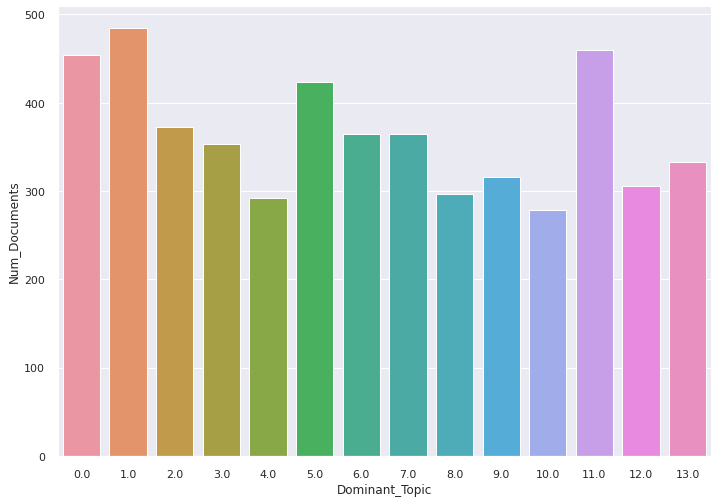

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
positive_domin_topic_num = sns.barplot(x='Dominant_Topic',y='Num_Documents',data = positive_topic_nums_for_plot)

## Negative LDA Mallet Model

### Computing Coherence values corresponding to the LDA model with respective number of topics

In [ ]:
negative_model_list, negative_coherence_values = compute_coherence_values(dictionary=negative_id2word, corpus=negative_corpus, texts=negative_texts, start=2, limit=40, step=6)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is

### Graph of Coherence Scores x Num of Topics

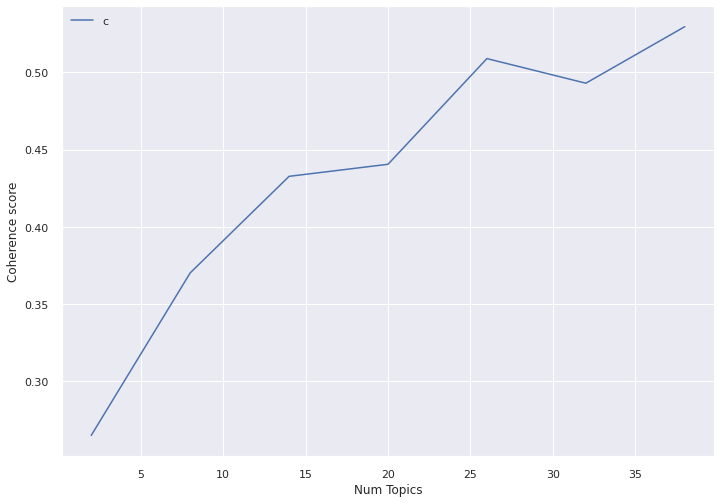

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, negative_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### The Coherence Scores of every model

In [ ]:
# Print the coherence scores
for m, cv in zip(x, negative_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2648
Num Topics = 8  has Coherence Value of 0.3701
Num Topics = 14  has Coherence Value of 0.4326
Num Topics = 20  has Coherence Value of 0.4404
Num Topics = 26  has Coherence Value of 0.5089
Num Topics = 32  has Coherence Value of 0.493
Num Topics = 38  has Coherence Value of 0.5296


### Selecting model and showing the topics


In [ ]:
# Select the model and print the topics
negative_optimal_model = negative_model_list[4]
model_topics = negative_optimal_model.show_topics(formatted=False)
pprint(negative_optimal_model.print_topics(num_words=10))

[(17,
  '0.225*"electric" + 0.160*"vehicle" + 0.038*"climate_change" + '
  '0.021*"carbon" + 0.019*"simply" + 0.016*"crisis" + 0.013*"community" + '
  '0.012*"study" + 0.012*"current" + 0.010*"dangerous"'),
 (22,
  '0.160*"electric" + 0.099*"biden" + 0.041*"american" + 0.039*"run" + '
  '0.033*"force" + 0.032*"america" + 0.025*"reject" + 0.024*"administration" + '
  '0.020*"president" + 0.020*"sell"'),
 (13,
  '0.256*"vehicle" + 0.230*"electric" + 0.014*"imagine" + 0.014*"shut" + '
  '0.012*"subsidy" + 0.011*"law" + 0.009*"impact" + 0.009*"sense" + '
  '0.009*"miss" + 0.009*"reduce"'),
 (3,
  '0.176*"battery" + 0.040*"grid" + 0.032*"owner" + 0.027*"source" + '
  '0.024*"war" + 0.024*"range" + 0.023*"article" + 0.022*"national" + '
  '0.020*"threat" + 0.017*"great"'),
 (4,
  '0.153*"fire" + 0.031*"burning" + 0.028*"cargo_ship" + 0.028*"ship" + '
  '0.026*"lithium_ion_battery" + 0.025*"fight" + 0.024*"catch" + '
  '0.021*"extinguish" + 0.019*"felicity_ace" + 0.019*"vehicle"'),
 (9,
  '0.

### Dominant Topics with their percentage contribution

In [ ]:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

def negative_topics(ldamodel, corpus):
    # Init output
    df_negative_topics = pd.DataFrame()


    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                df_negative_topics = df_negative_topics.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    df_negative_topics.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    return(df_negative_topics)


# df_topic_sents_keywords = 
dominant_negative_topics = negative_topics(ldamodel=negative_optimal_model, corpus=negative_corpus).groupby('Dominant_Topic')

df_dominant_negative_topics = pd.DataFrame()

for i, grp in dominant_negative_topics:
    df_dominant_negative_topics = pd.concat([df_dominant_negative_topics, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
df_dominant_negative_topics.reset_index(drop=True, inplace=True)

# Format
df_dominant_negative_topics.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords"]

# Show
df_dominant_negative_topics.head(26)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


Topic_Num  Topic_Perc_Contrib  \
0         0.0              0.2117   
1         1.0              0.2314   
2         2.0              0.2178   
3         3.0              0.1470   
4         4.0              0.2272   
5         5.0              0.1832   
6         6.0              0.1827   
7         7.0              0.1424   
8         8.0              0.1243   
9         9.0              0.1878   
10       10.0              0.1579   
11       11.0              0.1047   
12       12.0              0.1629   
13       13.0              0.1100   
14       14.0              0.1841   
15       15.0              0.1603   
16       16.0              0.1405   
17       17.0              0.1116   
18       18.0              0.1971   
19       19.0              0.2392   
20       20.0              0.1929   
21       21.0              0.0920   
22       22.0              0.1548   
23       23.0              0.1540   
24       24.0              0.1574   
25       25.0              0.1527   

                                             Keywords  
0   buy, plan, truck, dejoy, gas, power, fleet, re...  
1   tesla, news, model, elon_musk, country, ceo, i...  
2   stop, world, pollution, auto, talk, life, cont...  
3   battery, grid, owner, source, war, range, arti...  
4   fire, burning, cargo_ship, ship, lithium_ion_b...  
5   brand, switch, mining, move, system, global, s...  
6   vehicle, put, risk, recall, problem, due, park...  
7   time, year, long, wait, air, tsla, real, diese...  
8   make, bad, electric, thing, show, today, back,...  
9   people, drive, tax, pay, afford, home, fuck, h...  
10  electric, vehicle, reason, environment, save, ...  
11  vehicle, electric, build, stick, pocket, union...  
12  charge, station, point, uk, infrastructure, se...  
13  vehicle, electric, imagine, shut, subsidy, law...  
14  energy, oil, power, electricity, fossil_fuel, ...  
15  work, read, company, driver, give, face, call,...  
16  car, fuel, road, end, green, petrol, full, fil...  
17  electric, vehicle, climate_change, carbon, sim...  
18  cost, charger, car, china, sale, wrong, consum...  
19  car, emission, produce, public, lead, state, i...  
20  gas, price, high, russia, rise, ukraine, recor...  
21  vehicle, electric, push, lie, line, destroy, b...  
22  electric, biden, american, run, force, america...  
23  market, lithium, supply, demand, problem, crea...  
24  big, government, future, expensive, issue, cli...  
25  ev, good, production, supply_chain, part, numb...

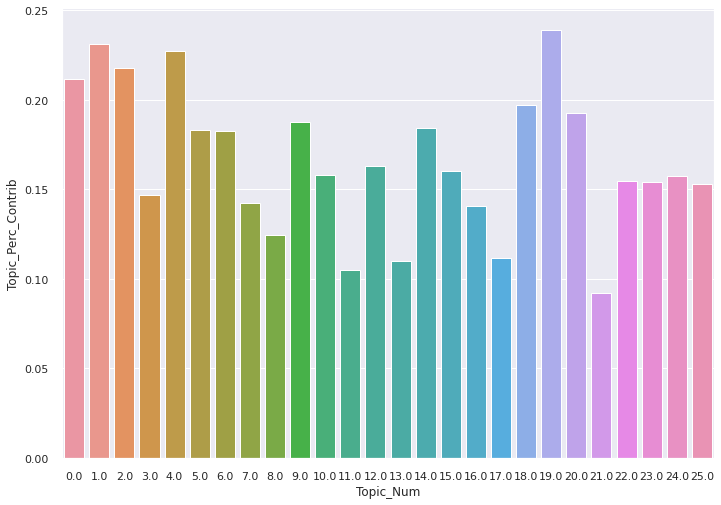

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
negative_perc_cont_topic_num = sns.barplot(x='Topic_Num',y='Topic_Perc_Contrib',data = df_dominant_negative_topics)

### WordCloud of Topics of Negative Tweets

buy, plan, truck, dejoy, gas, power, fleet, replace, usps, postal_service


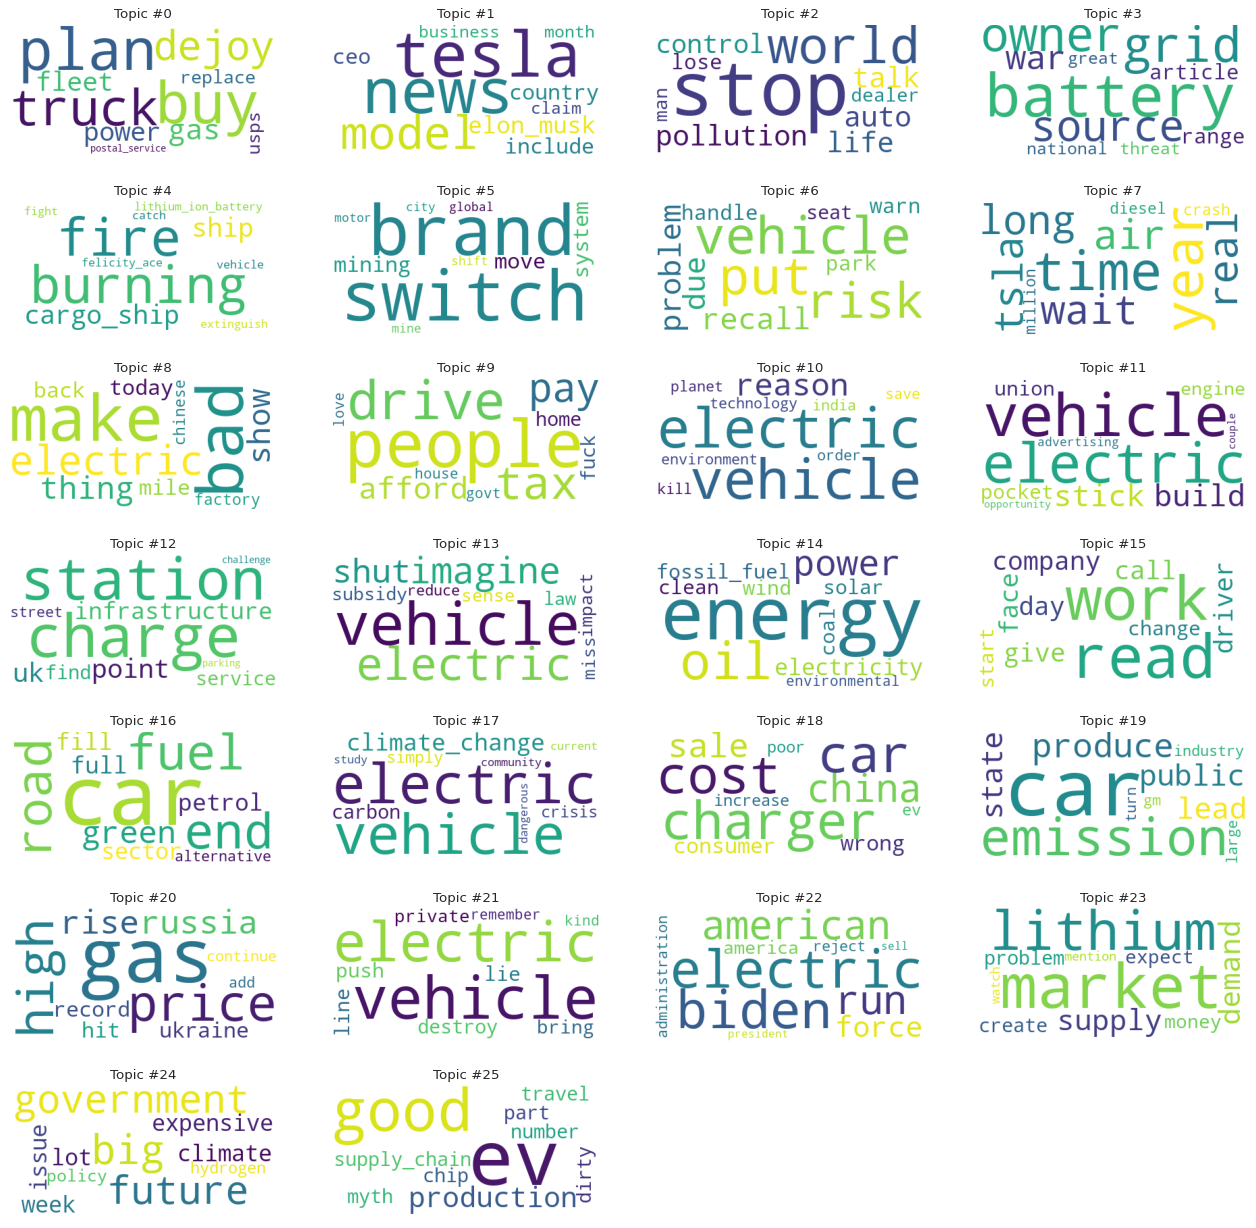

In [ ]:
topic = df_dominant_negative_topics.Keywords
print(topic[0])
display_wordcloud(topic, 'title', 26)

### How Topics of Negative Tweets Change Overtime 3 day periods



In [ ]:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

negative_original_tweets = df[df['Sentiment Analysis'] == 'Negative']['Text']
data_negative = negative_original_tweets.values.tolist()
data_tweet_dates = negative_original_tweets = df[df['Sentiment Analysis'] == 'Negative']['Date'].apply(str)
data_negative_dates = data_tweet_dates.values.tolist()

def format_topics_sentences(ldamodel, corpus, texts, dates):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    dates = pd.Series(dates)
    sent_topics_df = pd.concat([sent_topics_df, contents, dates], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=negative_optimal_model, corpus=negative_corpus, texts=data_negative, dates=data_negative_dates)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Date']

# Show
# print(df_dominant_topic)
df_dominant_topic.head()

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.0676   
1            1            12.0              0.0613   
2            2            10.0              0.0661   
3            3             8.0              0.0594   
4            4             6.0              0.0510   

                                            Keywords  \
0  tesla, news, model, elon_musk, country, ceo, i...   
1  charge, station, point, uk, infrastructure, se...   
2  electric, vehicle, reason, environment, save, ...   
3  make, bad, electric, thing, show, today, back,...   
4  vehicle, put, risk, recall, problem, due, park...   

                                                Text                 Date  
0  Hurts me to post this (sorry fellow Tesla driv...  2022-02-04 00:00:00  
1  detroit: we will build one (1) mile of electri...  2022-02-04 00:00:00  
2  Warren Says Powell 'Failed' as Leader (Podcast...  2022-02-04 00:00:00  
3  Why should you care about this?  Because it’s ...  2022-02-04 00:00:00  
4  What the heck happened to the visualization? 😳...  2022-02-04 00:00:00

### How Topics of Negative Tweets Change Overtime 6 day periods

In [ ]:
conditions = [
    (df_dominant_topic['Date'] == '2022-02-04 00:00:00') | (df_dominant_topic['Date'] == '2022-02-05 00:00:00') | (df_dominant_topic['Date'] == '2022-02-06 00:00:00') |
    (df_dominant_topic['Date'] == '2022-02-07 00:00:00') | (df_dominant_topic['Date'] == '2022-02-08 00:00:00') | (df_dominant_topic['Date'] == '2022-02-09 00:00:00'),
    (df_dominant_topic['Date'] == '2022-02-10 00:00:00') | (df_dominant_topic['Date'] == '2022-02-11 00:00:00') | (df_dominant_topic['Date'] == '2022-02-12 00:00:00')|
    (df_dominant_topic['Date'] == '2022-02-13 00:00:00') | (df_dominant_topic['Date'] == '2022-02-14 00:00:00') | (df_dominant_topic['Date'] == '2022-02-15 00:00:00'),
    (df_dominant_topic['Date'] == '2022-02-16 00:00:00') | (df_dominant_topic['Date'] == '2022-02-17 00:00:00') | (df_dominant_topic['Date'] == '2022-02-18 00:00:00')|
    (df_dominant_topic['Date'] == '2022-02-19 00:00:00') | (df_dominant_topic['Date'] == '2022-02-20 00:00:00') | (df_dominant_topic['Date'] == '2022-02-21 00:00:00'),
    (df_dominant_topic['Date'] == '2022-02-22 00:00:00') | (df_dominant_topic['Date'] == '2022-02-23 00:00:00') | (df_dominant_topic['Date'] == '2022-02-24 00:00:00')|
    (df_dominant_topic['Date'] == '2022-02-25 00:00:00') | (df_dominant_topic['Date'] == '2022-02-26 00:00:00') | (df_dominant_topic['Date'] == '2022-02-27 00:00:00'),
    ]

# create a list of the values we want to assign for each condition
values=['4/2-9/2','10/2-15/2','16/2-21/2','22/2-27/2']
# create a new column and use np.select to assign values to it using our lists as arguments
df_dominant_topic['6_Day_Period'] = np.select(conditions, values)


df_dominant_topic

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0               0             1.0              0.0676   
1               1            12.0              0.0613   
2               2            10.0              0.0661   
3               3             8.0              0.0594   
4               4             6.0              0.0510   
...           ...             ...                 ...   
1500         1500             7.0              0.0772   
1501         1501            18.0              0.0750   
1502         1502            24.0              0.1117   
1503         1503             3.0              0.0562   
1504         1504             3.0              0.0523   

                                               Keywords  \
0     tesla, news, model, elon_musk, country, ceo, i...   
1     charge, station, point, uk, infrastructure, se...   
2     electric, vehicle, reason, environment, save, ...   
3     make, bad, electric, thing, show, today, back,...   
4     vehicle, put, risk, recall, problem, due, park...   
...                                                 ...   
1500  time, year, long, wait, air, tsla, real, diese...   
1501  cost, charger, car, china, sale, wrong, consum...   
1502  big, government, future, expensive, issue, cli...   
1503  battery, grid, owner, source, war, range, arti...   
1504  battery, grid, owner, source, war, range, arti...   

                                                   Text                 Date  \
0     Hurts me to post this (sorry fellow Tesla driv...  2022-02-04 00:00:00   
1     detroit: we will build one (1) mile of electri...  2022-02-04 00:00:00   
2     Warren Says Powell 'Failed' as Leader (Podcast...  2022-02-04 00:00:00   
3     Why should you care about this?  Because it’s ...  2022-02-04 00:00:00   
4     What the heck happened to the visualization? 😳...  2022-02-04 00:00:00   
...                                                 ...                  ...   
1500  This is some of the dumbest FUD I’ve read in a...  2022-02-27 00:00:00   
1501  Biden and his propagandist Psaki are totally o...  2022-02-27 00:00:00   
1502  I know @Shell have bigger problems than this a...  2022-02-27 00:00:00   
1503  Dead old #EV batteries. What happens then? htt...  2022-02-27 00:00:00   
1504  Just trying to educate someone (as always) abo...  2022-02-27 00:00:00   

     6_Day_Period  
0         4/2-9/2  
1         4/2-9/2  
2         4/2-9/2  
3         4/2-9/2  
4         4/2-9/2  
...           ...  
1500    22/2-27/2  
1501    22/2-27/2  
1502    22/2-27/2  
1503    22/2-27/2  
1504    22/2-27/2  

[1505 rows x 7 columns]

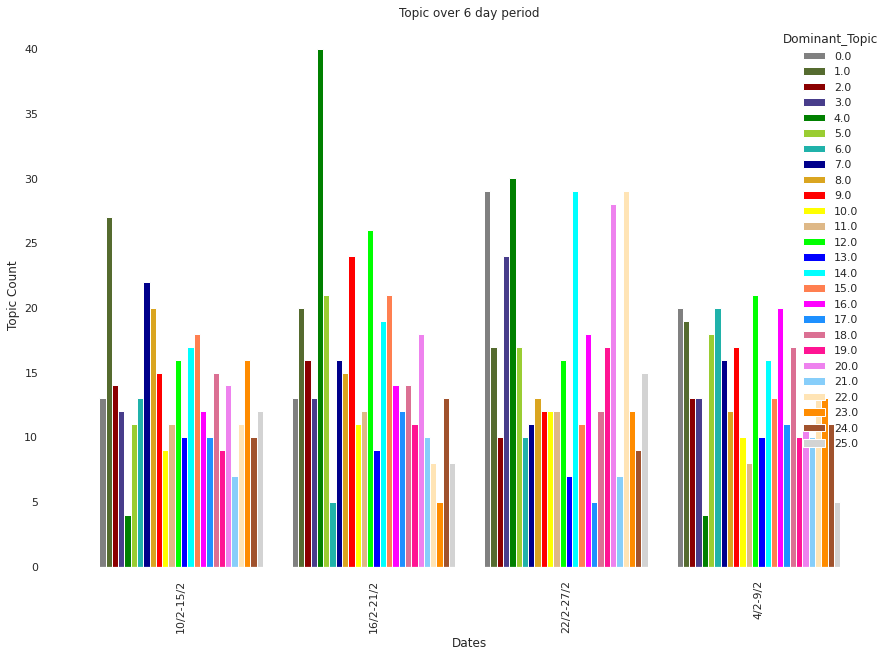

In [ ]:
df_topics_overtime = df_dominant_topic[['Dominant_Topic','6_Day_Period']]
ax_topics_over_6_day_period = df_topics_overtime.groupby(['6_Day_Period','Dominant_Topic']).size().unstack('Dominant_Topic',fill_value=0)
color_pallette = ['#808080', '#556b2f', '#8b0000', '#483d8b', '#008000', '#9acd32', '#20b2aa', '#00008b', '#daa520', '#ff0000', '#ffff00',
                  '#deb887', '#00ff00', '#0000ff', '#00ffff', '#ff7f50', '#ff00ff', '#1e90ff', '#db7093', '#ff1493','#ee82ee','#87cefa','#ffe4b5','#ff8c00','#a0522d','#d3d3d3']
P_6 = ax_topics_over_6_day_period.plot(kind='bar', figsize=(15,10),title='Topic over 6 day period', color = color_pallette,
                                 xlabel='Dates', ylabel='Topic Count', width=0.85)
P_6.set_facecolor('#ffffff')

In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text", "Date"]

# Show
sent_topics_sorteddf_mallet.head(150)


Topic_Num  Topic_Perc_Contrib  \
0          0.0              0.2117   
1          0.0              0.2100   
2          0.0              0.2045   
3          0.0              0.2034   
4          0.0              0.2025   
..         ...                 ...   
125       25.0              0.1527   
126       25.0              0.1335   
127       25.0              0.1309   
128       25.0              0.1299   
129       25.0              0.1166   

                                              Keywords  \
0    buy, plan, truck, dejoy, gas, power, fleet, re...   
1    buy, plan, truck, dejoy, gas, power, fleet, re...   
2    buy, plan, truck, dejoy, gas, power, fleet, re...   
3    buy, plan, truck, dejoy, gas, power, fleet, re...   
4    buy, plan, truck, dejoy, gas, power, fleet, re...   
..                                                 ...   
125  ev, good, production, supply_chain, part, numb...   
126  ev, good, production, supply_chain, part, numb...   
127  ev, good, production, supply_chain, part, numb...   
128  ev, good, production, supply_chain, part, numb...   
129  ev, good, production, supply_chain, part, numb...   

                                                  Text                 Date  
0    The White House and Environmental Protection A...  2022-02-04 00:00:00  
1    The idiot DeJoy is defying the White House and...  2022-02-23 00:00:00  
2    WHY IS LOUIS DEJOY STILL THE POSTMASTER HE IS ...  2022-02-24 00:00:00  
3    Why is the USPS/DeJoy allowed to ignore EPA ma...  2022-02-25 00:00:00  
4    Biden White House, Dems and Enviros Cry Foul o...  2022-02-25 00:00:00  
..                                                 ...                  ...  
125  EV production emissions myths found to be just...  2022-02-24 00:00:00  
126  “The supply chain for combustion vehicles is j...  2022-02-27 00:00:00  
127  Porsche Explodes The “EVs Aren’t Good For Long...  2022-02-11 00:00:00  
128  😮Coast to coast trip?! ⚡Porsche Explodes The “...  2022-02-12 00:00:00  
129  Our EVForward study of future EV buyers has re...  2022-02-15 00:00:00  

[130 rows x 5 columns]

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
# df_dominant_topics.head(10)

negative_grouped_df=df_dominant_topics.groupby(by=['Dominant_Topic'])
negative_topic_nums_for_plot = pd.DataFrame(negative_grouped_df.size().reset_index(name = "Num_Documents"))
negative_topic_nums_for_plot.head(26)

Dominant_Topic  Num_Documents
0              0.0             75
1              1.0             83
2              2.0             53
3              3.0             62
4              4.0             78
5              5.0             67
6              6.0             48
7              7.0             65
8              8.0             60
9              9.0             68
10            10.0             42
11            11.0             43
12            12.0             79
13            13.0             36
14            14.0             81
15            15.0             63
16            16.0             64
17            17.0             38
18            18.0             58
19            19.0             47
20            20.0             71
21            21.0             34
22            22.0             61
23            23.0             46
24            24.0             43
25            25.0             40

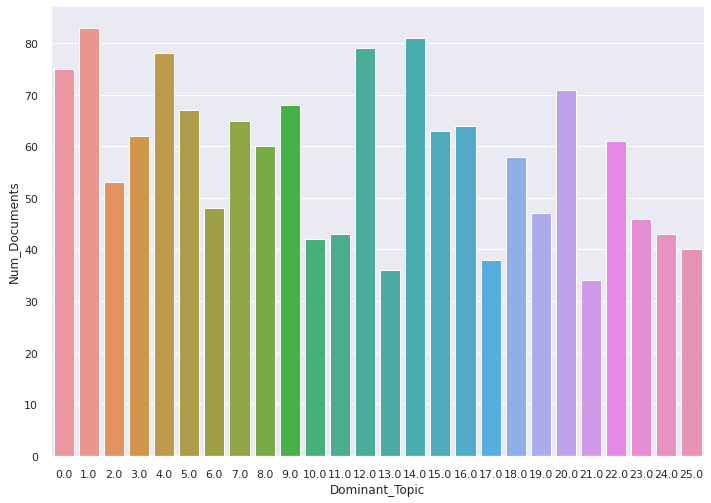

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
negative_domin_topic_num = sns.barplot(x='Dominant_Topic',y='Num_Documents',data = negative_topic_nums_for_plot)